# Analyse Continous Model #

In [1]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import numpy as np

import sys
sys.path.append('../qubo')

## Collect total delay data ##

In [2]:
def allFactors(N):
    factors = []
    for n in range(1, N + 1):
        if N % n == 0:
            factors.append(n)
    return factors

In [3]:
pmin = 0
pmax = 45
maxDelayPrecalc = 18
maxDelayDummy = 18
delayStepDummy = 3
maxDelaysList = allFactors(18)
totaldelays = {}
totaldelays_cont = {}
numFlights = {}
numConflicts = {}
for partition in range(pmin, pmax + 1):
    # get number of flights and conflicts
    instancefile = '../../../../precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_%03i/atm_instance_partition%04i_delayStep%03i_maxDelay%03i.h5' % (maxDelayPrecalc, partition, delayStepDummy, maxDelayDummy)
    f = h5py.File(instancefile, 'r')
    numFlights[partition] = f['Instance'].attrs['Number of flights']
    numConflicts[partition] = f['Instance'].attrs['Number of conflicts']
    f.close()
    resultfile = '../data/connectedComponents/maxDelayPrecalc%03i/results/atm_instance_partition%04i.results.h5' % (maxDelayPrecalc, partition)

    f = h5py.File(resultfile, 'r')
    tdc = {}
    for maxDelay in maxDelaysList:
        numDelaysList = allFactors(maxDelay)
        td = []
        nd = []
        for numDelays in numDelaysList:
            groupname = "solution_constraint_programming_numDelays%03i_maxDelay%03i" % (numDelays, maxDelay)
            if groupname in f:
                g = f[groupname]
                if 'total delay' in g.attrs.keys():
                    td.append(g.attrs['total delay'])
                    nd.append(numDelays)
        if not all(np.array(td) == 0):
            if not partition in totaldelays:
                totaldelays[partition] = {}
            totaldelays[partition][maxDelay] = (nd, td)
        # get results for continuous variables
        groupname = "solution_constraint_programming_numDelays%03i_maxDelay%03i" % (0, maxDelay)
        if groupname in f:
            g = f[groupname]
            if 'total delay' in g.attrs.keys():
                tdc[maxDelay] = (g.attrs['total delay'])
    if not all(np.array(tdc.values()) == 0):
        totaldelays_cont[partition] = tdc
    f.close()

## Plot total delay of solution versus maximum delay ##

In [4]:
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


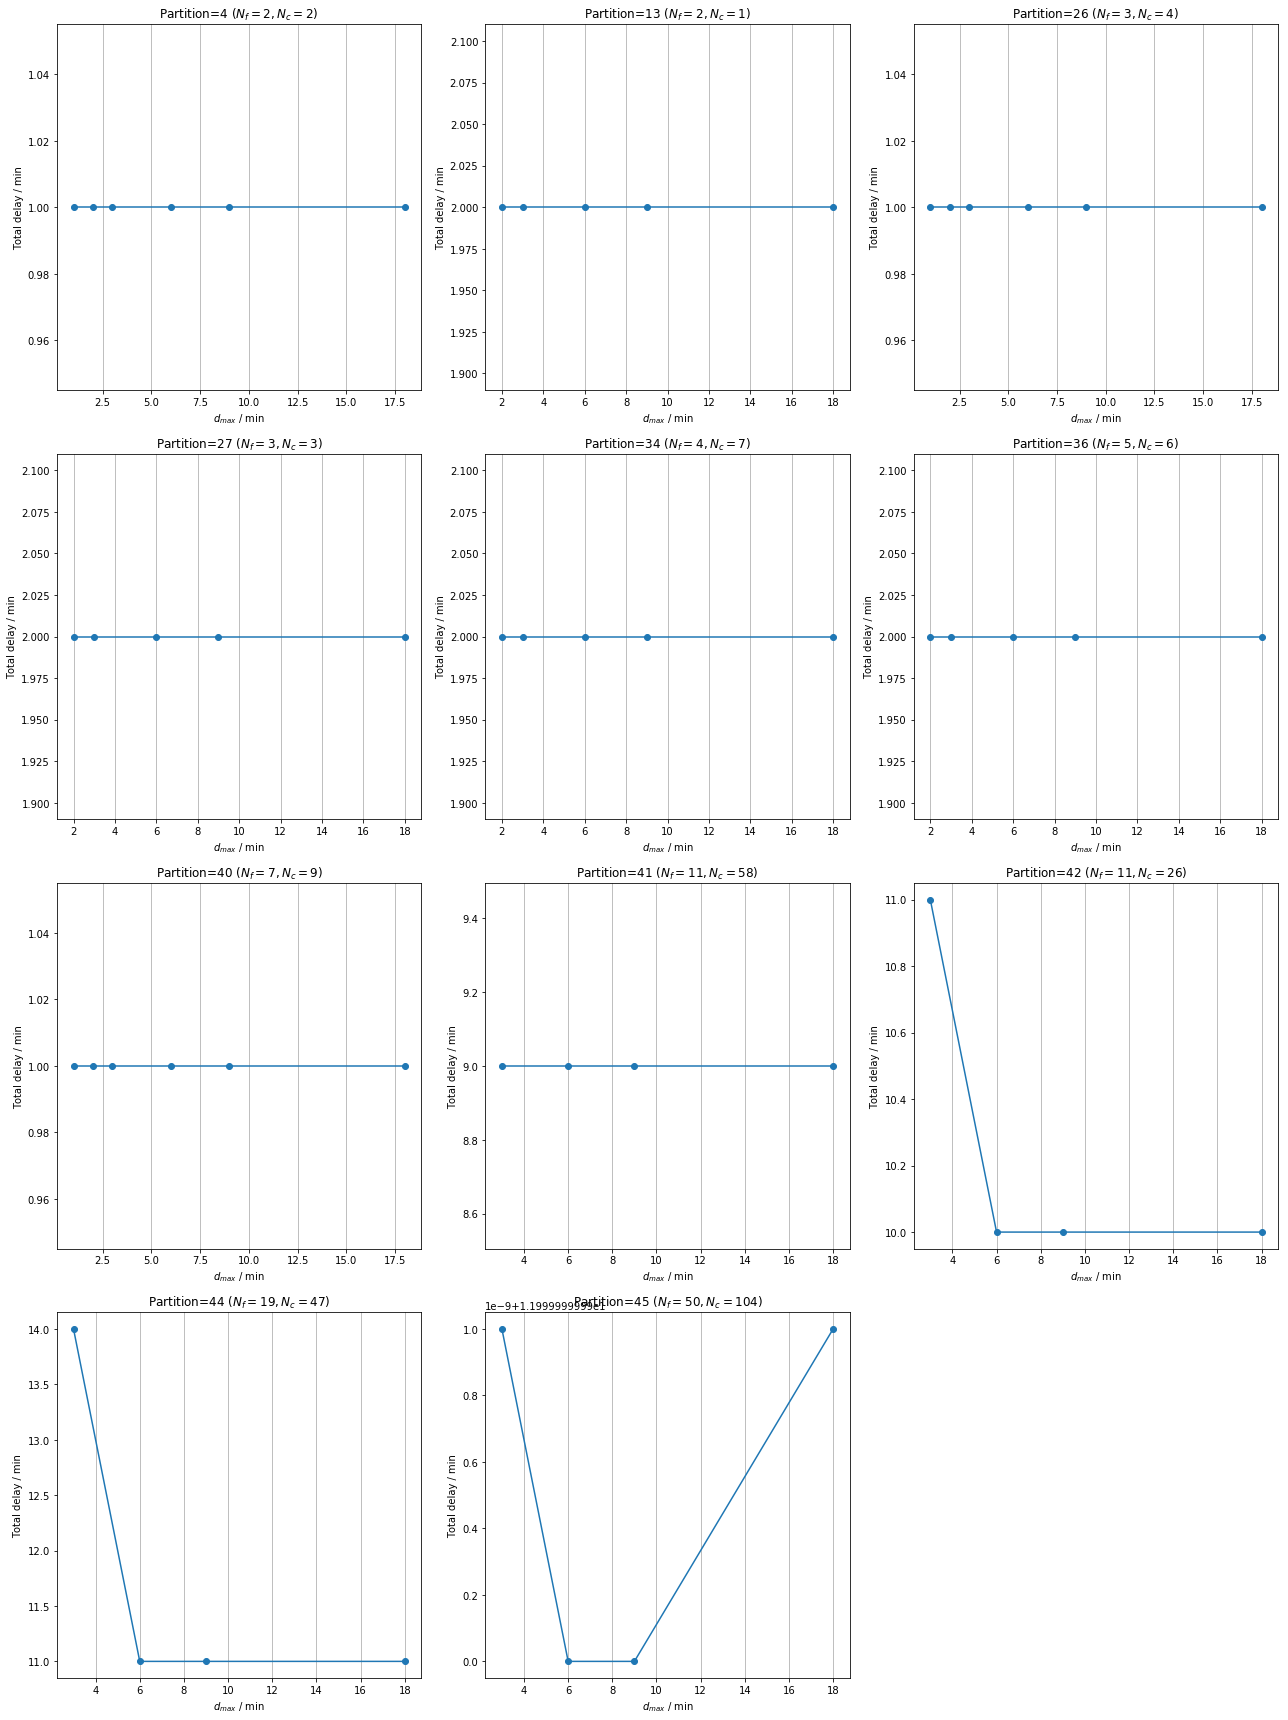

In [5]:
ncol = 3
Np = len(totaldelays.keys())
nrow = Np / ncol + (Np % ncol != 0)
fig = plt.figure(figsize=(6 * ncol, 6 * nrow))
n = 0
for partition in sorted(totaldelays.keys()):
    ax = fig.add_subplot(nrow, ncol, n + 1)
    td = totaldelays_cont[partition]
    x = sorted(td.keys())
    y = []
    for k in x:
        y.append(td[k])
    ax.plot(x, y, 'o-')
    ax.legend(loc='upper right')
    ax.grid(axis='x')
    ax.set_xlabel('$d_{max}$ / min')
    ax.set_ylabel('Total delay / min')
    ax.set_title('Partition=%i ($N_f=%i, N_c=%i$)' % (partition, numFlights[partition], numConflicts[partition]))

    n = n + 1
plt.tight_layout()


## Save plots to PDF file ##

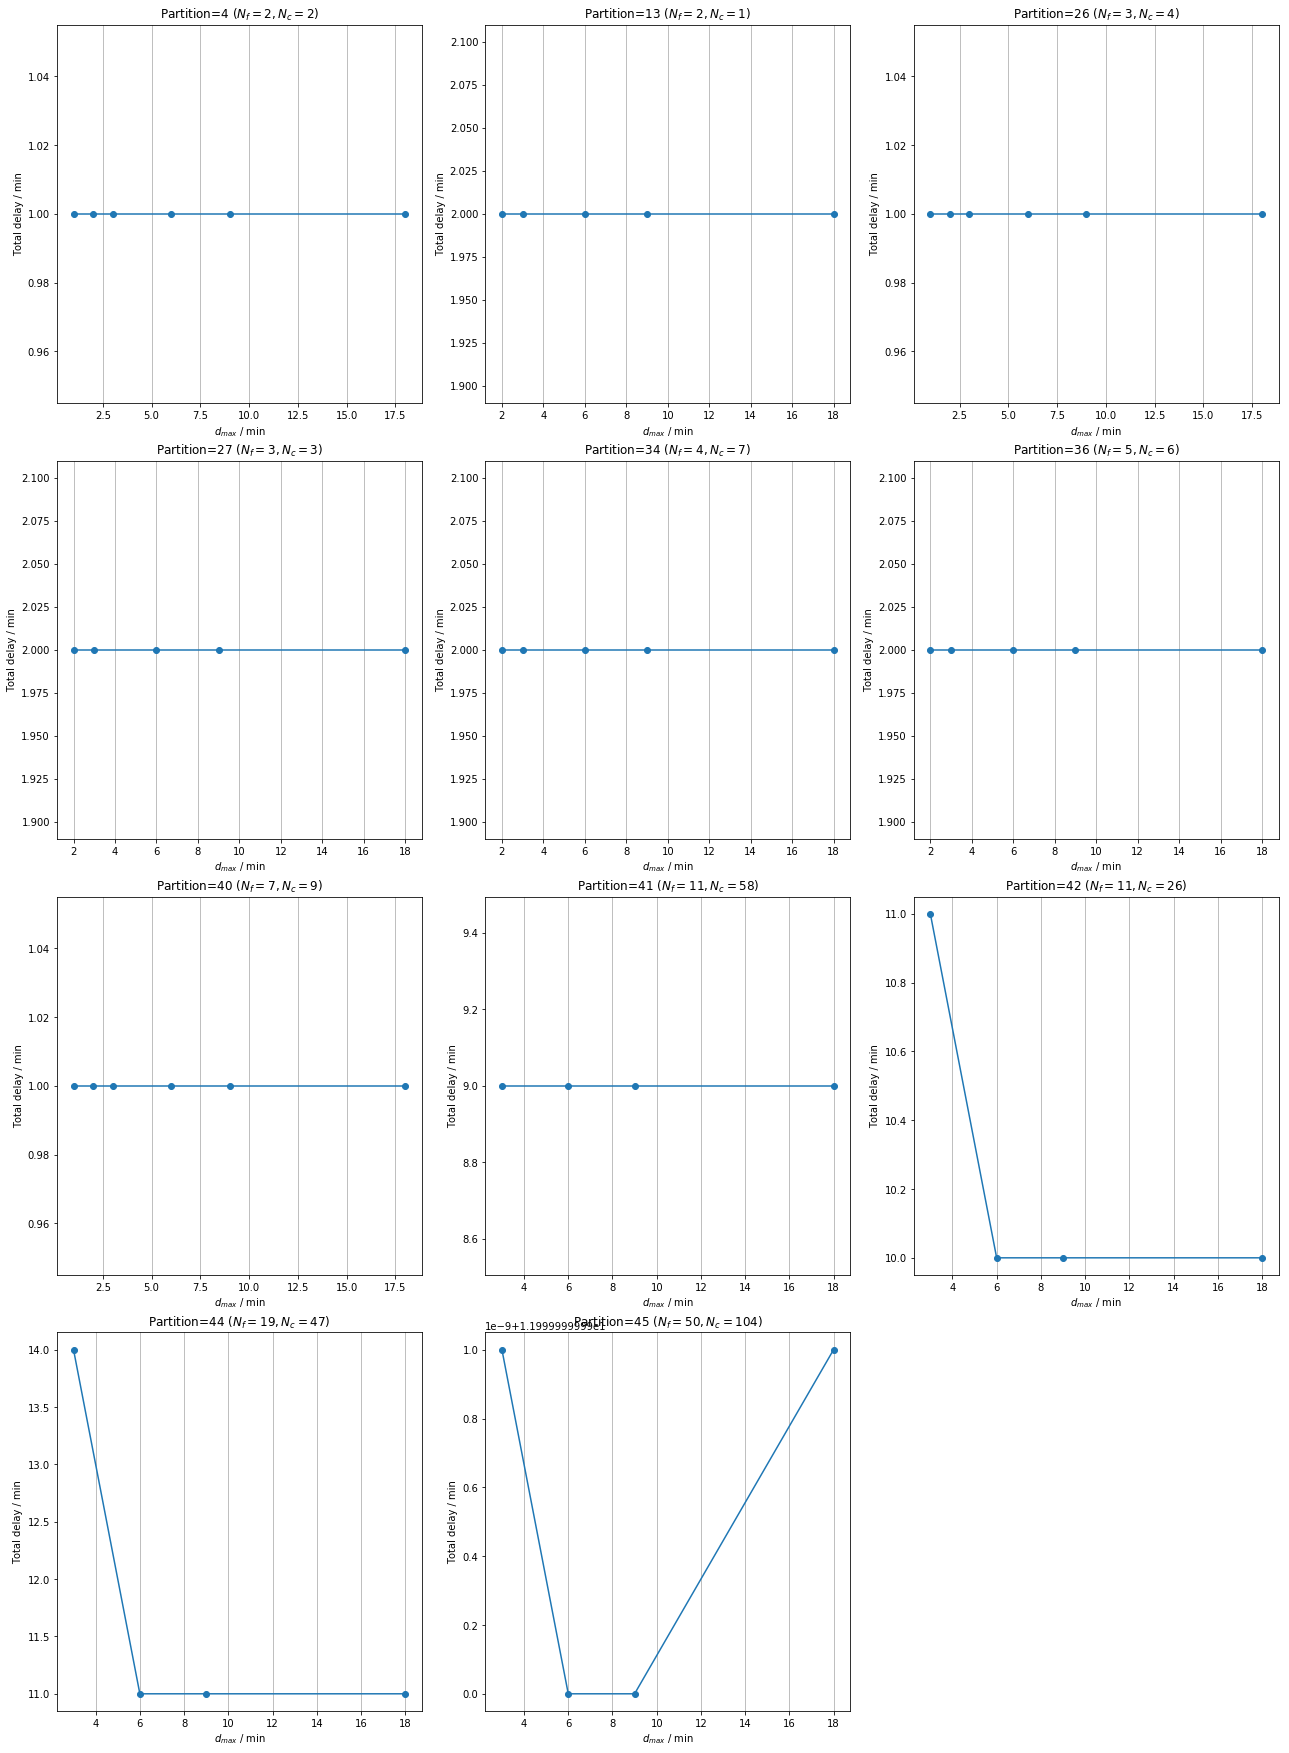

In [6]:
nperpage = 5

ncol = 3
Np = len(totaldelays.keys())
nrow = Np / ncol + (Np % ncol != 0)
pdf = matplotlib.backends.backend_pdf.PdfPages('totalDelayVsMaxDelayContinuous.pdf');
n = 0
for partition in sorted(totaldelays.keys()):
    if n % (ncol * nperpage) == 0:
        fig = plt.figure(figsize=(6 * ncol, 6 * nperpage));

    ax = fig.add_subplot(nperpage, ncol, n % (ncol * nperpage) + 1)
    td = totaldelays_cont[partition]
    x = sorted(td.keys())
    y = []
    for k in x:
        y.append(td[k])
    ax.plot(x, y, 'o-')
    ax.legend(loc='upper right')
    ax.grid(axis='x')
    ax.set_xlabel('$d_{max}$ / min')
    ax.set_ylabel('Total delay / min')
    ax.set_title('Partition=%i ($N_f=%i, N_c=%i$)' % (partition, numFlights[partition], numConflicts[partition]))
    
    if n % (ncol * nperpage) == ncol * nperpage - 1:
        pdf.savefig(figure=fig);
    n = n + 1
pdf.savefig(figure=fig);
pdf.close();
plt.tight_layout()

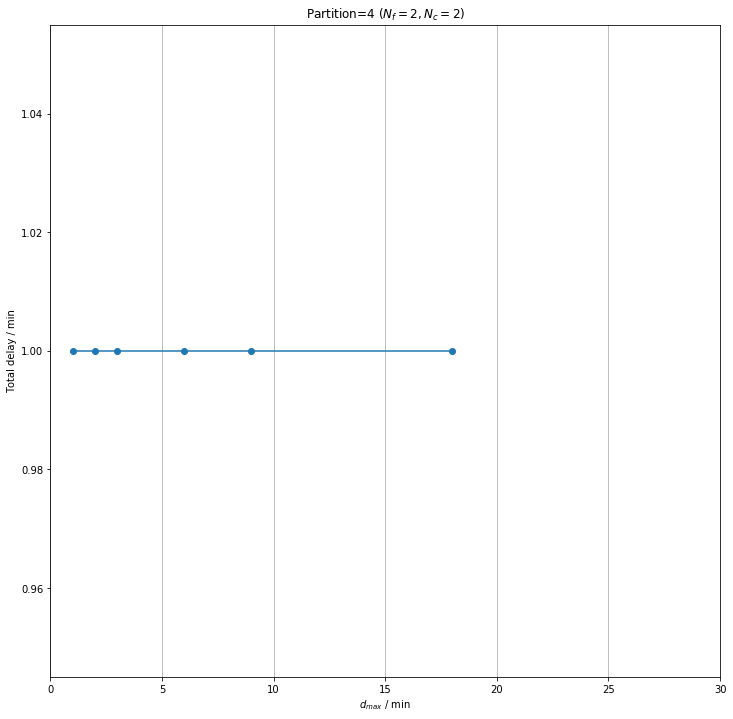

In [7]:

fig = plt.figure(figsize=(12 , 12))
partition = 4
ax = fig.add_subplot(1, 1, 1)
td = totaldelays_cont[partition]
x = sorted(td.keys())
y = []
for k in x:
    y.append(td[k])
ax.plot(x, y, 'o-')
ax.legend(loc='upper right')
ax.grid(axis='x')
ax.set_xlabel('$d_{max}$ / min')
ax.set_ylabel('Total delay / min')
ax.set_title('Partition=%i ($N_f=%i, N_c=%i$)' % (partition, numFlights[partition], numConflicts[partition]))
ax.set_xlim(0,30)
plt.show()